In [1]:
import json
import itertools
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('data/train.json') as data:
  dishes = pd.read_json(data)

In [3]:
print("There are {0} total recipes.".format(len(dishes['id'].unique())))
dishes.head()

There are 39774 total recipes.


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
print("There are {0} total cuisines available.".format(len(dishes['cuisine'].unique())))
dishes['cuisine'].value_counts()

There are 20 total cuisines available.


italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [5]:
# Explode function in pandas 0.25
dishes = dishes.explode('ingredients')
dishes.head()

,id,cuisine,ingredients
0,10259,greek,romaine lettuce
0,10259,greek,black olives
0,10259,greek,grape tomatoes
0,10259,greek,garlic
0,10259,greek,pepper


In [6]:
def hbar_top_facet_grid(df, label, value, group, color='b'):
    # Get only top 5
    data = df.sort_values([group, value], ascending=False).groupby(group).head(5)

    # To view all styles: plt.style.available
    sns.set(style="white", font_scale = 1.9)

    # https://cduvallet.github.io/posts/2018/11/facetgrid-ylabel-access
    g = sns.FacetGrid(data.sort_values([group, value]), col=group, col_wrap=4, sharey=False, sharex=False, 
                      height=4, aspect=1.5)

    g = g.map(plt.barh, label, value, color=color)
    g = g.set_titles(col_template="{col_name}", size=24)
    g = g.set_xlabels(' ')
    g = g.set_ylabels(' ')

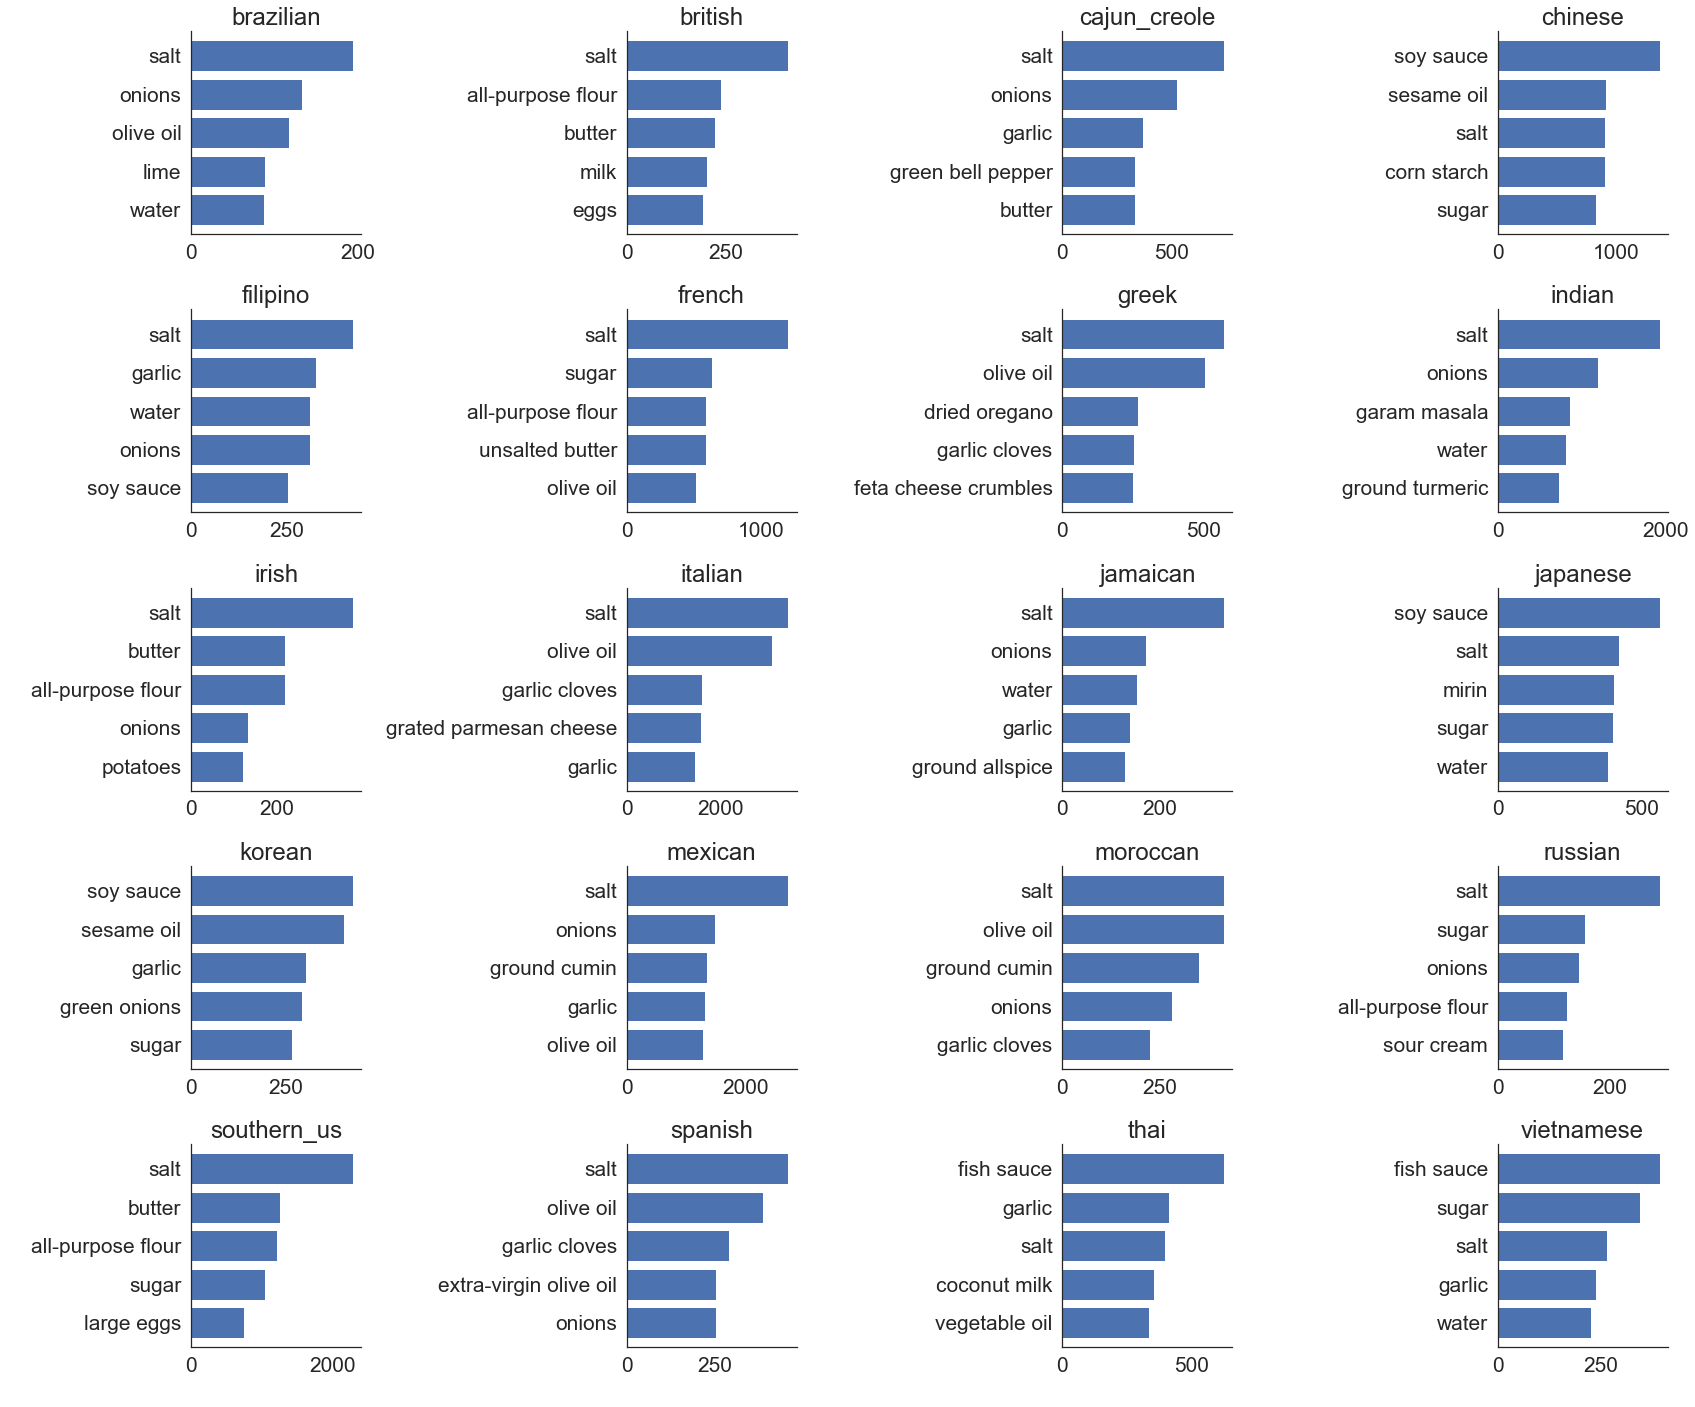

In [7]:
# group by ingredient - cuisine
data = pd.DataFrame(dishes.groupby(['cuisine', 'ingredients']).size().reset_index(name='count'))

hbar_top_facet_grid(data, 'ingredients', 'count', 'cuisine')

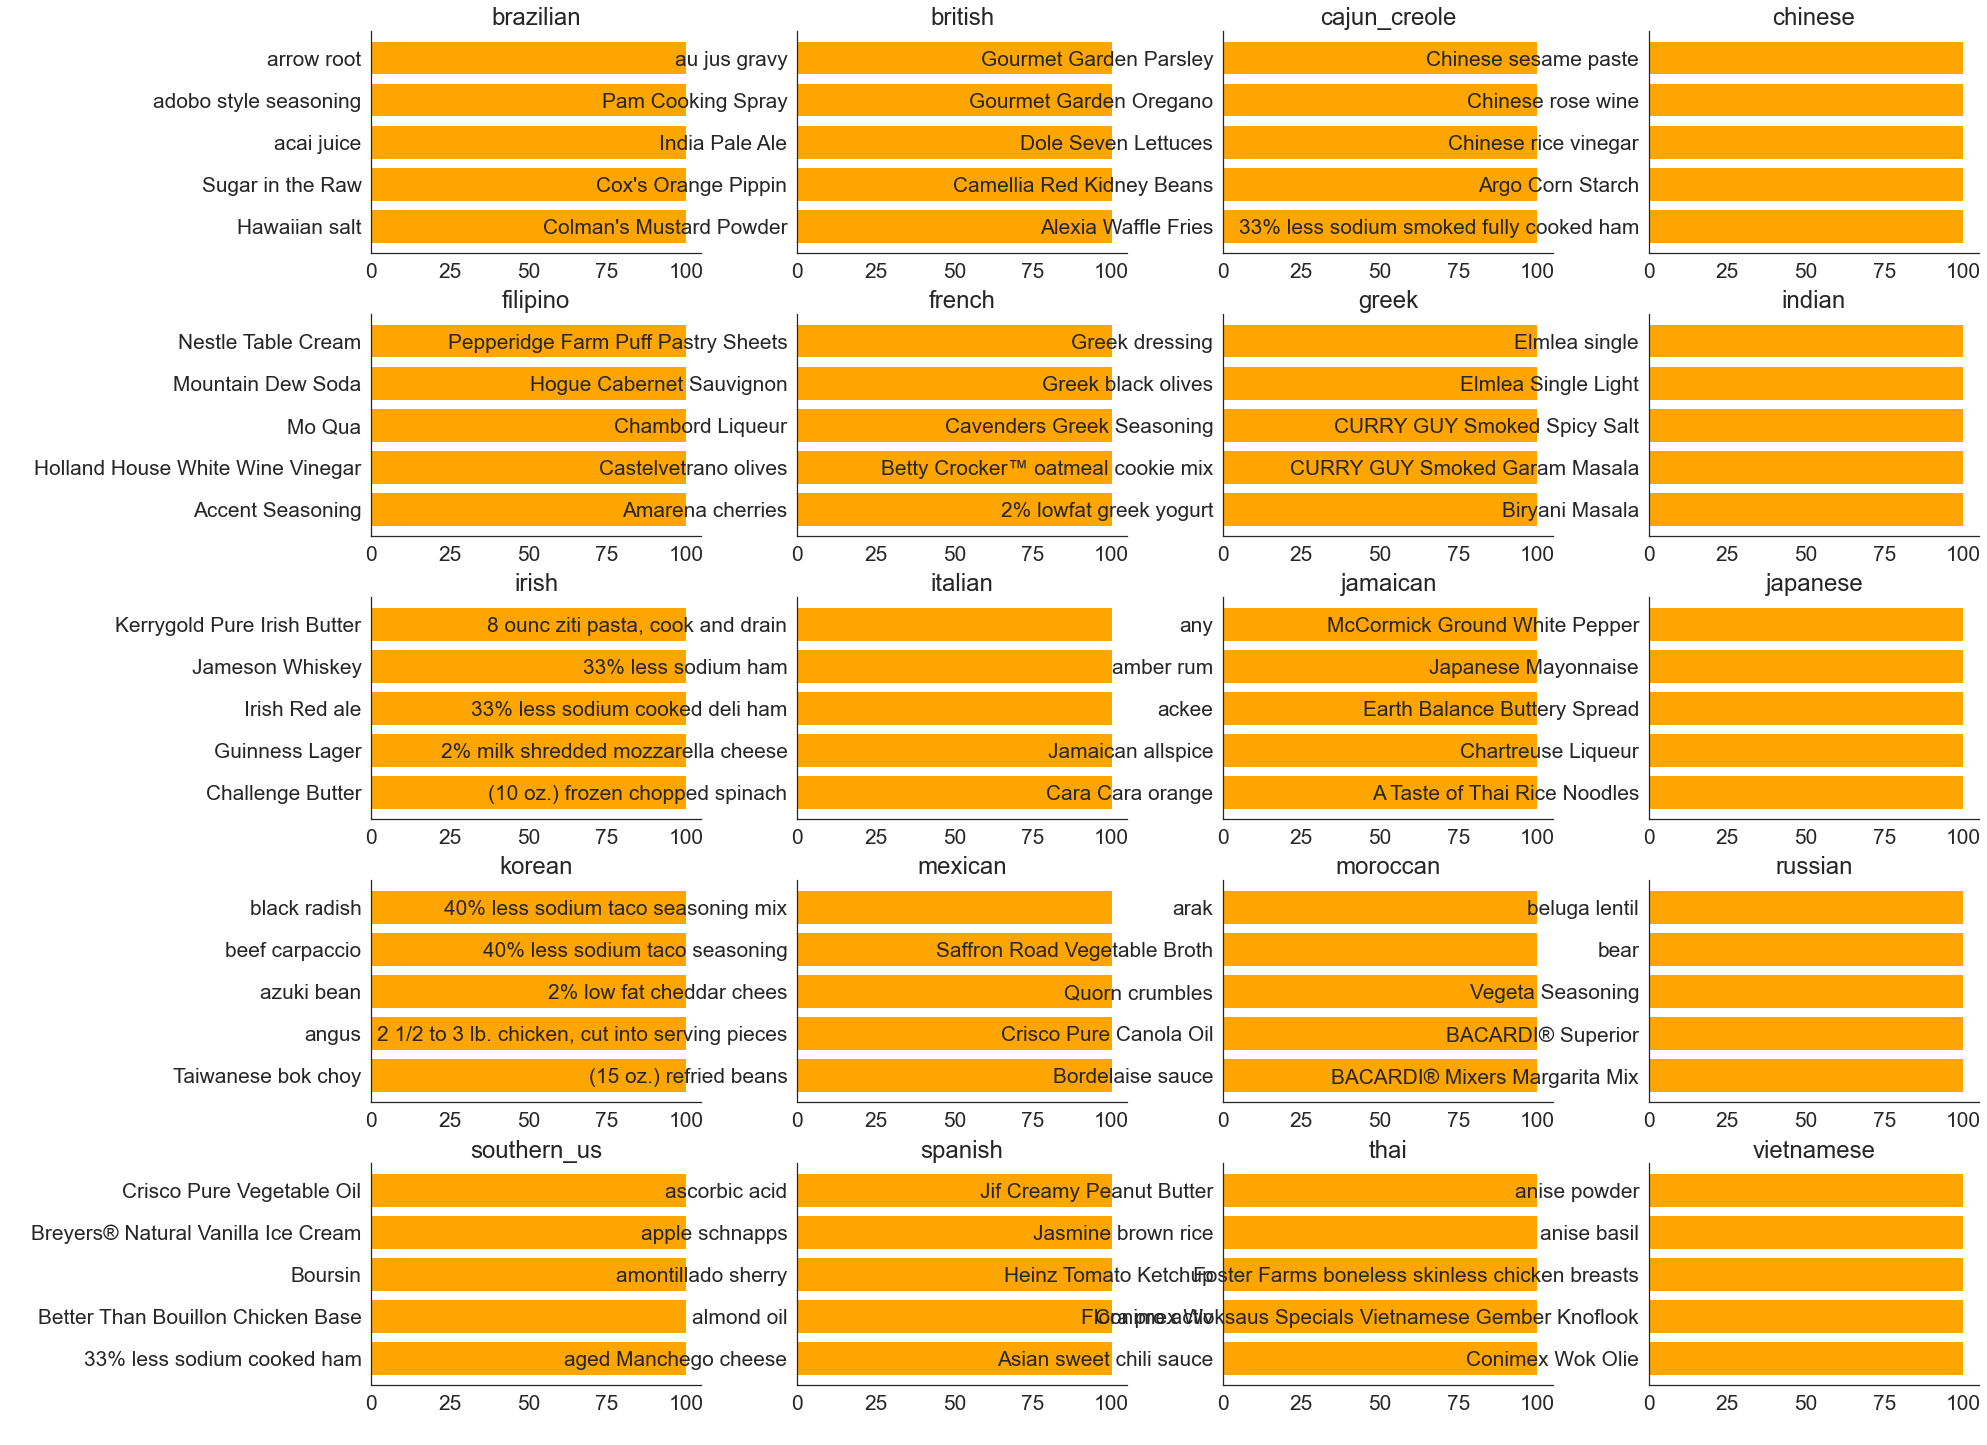

In [12]:
# How frequent is a specific cuisine ingredient used among all cuisines?
# we take advantage of groupby index from 
# https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
data = pd.DataFrame(dishes.groupby(['ingredients', 'cuisine']).size() / 
                    dishes.groupby('ingredients').size()).reset_index()
data.columns = ['ingredients', 'cuisine', 'percentage']
data['percentage'] = data['percentage']*100

# redraw
hbar_top_facet_grid(data, 'ingredients', 'percentage', 'cuisine', color='orange')

In [22]:
data.groupby('cuisine')['percentage'].value_counts(bins=10)

cuisine                      
brazilian   (-0.0706, 10.027]    655
            (10.027, 20.024]      65
            (90.003, 100.0]       51
            (40.018, 50.015]      30
            (20.024, 30.021]      25
                                ... 
vietnamese  (30.037, 40.032]      41
            (60.021, 70.016]       7
            (50.027, 60.021]       6
            (70.016, 80.011]       3
            (80.011, 90.005]       2
Name: percentage, Length: 200, dtype: int64

## Food Network

In [ ]:
with open('data/train.json') as data:
  dishes = json.load(data)

In [ ]:
def get_combinations(l):
    '''input list of items and output all pair edges'''
    g = []
    for i in itertools.combinations(l ,2):
        g.append(i)
    return g

In [ ]:
new_dict = []

for dish in dishes:
    edges_list = get_combinations(dish['ingredients'])
    for edges in edges_list:
        new_dict.append({'id':dish['id'], 'cuisine':dish['cuisine'], 'source': edges[0], 'target': edges[1]})  

In [ ]:
edge_df = pd.DataFrame.from_dict(new_dict).groupby(['source', 'target', 'cuisine']).size().reset_index(name='count')

In [ ]:
edge_df.sort_values(by='count', ascending=False)[:10].reset_index(drop=True)

In [ ]:
node_dfs = []

for cuisine, g in edge_df.groupby(['cuisine']):
    count = g['source'].append(g['target']).value_counts()
    count = pd.DataFrame({'cuisine':cuisine, 'node':count.index, 'size':count.values})
    node_dfs.append(count)
    
node_df = pd.concat(node_dfs, names=['cuisine', 'node', 'size'])
node_df.head()

In [ ]:
# for i in ['vietnamese', 'chinese']:
#     n = node_df[node_df['cuisine'] == i]
#     e = edge_df[edge_df['cuisine'] == i]
    
#     G = nx.Graph()
#     for node in n['node'].unique():
#         G.add_node(node)
        
#     nx.draw_networkx_nodes(G=G, pos=nx.spring_layout(G), node_list=G.nodes(), node_color='royalblue',
#                        alpha=0.8, node_size=(n['size']/1000).tolist())
#     nx.draw_networkx_edges(G=G, pos=nx.spring_layout(G), edge_color='red', alpha=0.2,
#                        width=e['count'], arrows=False)